

# Project: No-show medical appointments data-set investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row, which will help us predict if a patient will show up for their scheduled appointment and wich caracteristics are the most influencial ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('no_show.csv') 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(8), object(6)
memory usage: 11.8+ MB


In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

*Look for duplicates and delete them*

In [6]:
df.duplicated().sum()

0

*Remove AppointmentID since it isn't useful*

In [7]:
df.drop('AppointmentID', axis=1, inplace=True)

*Remove rows with age under 18 or older than 100*

In [8]:
df= df[(df['Age'] >= 18) & (df['Age'] <= 100)]
df.shape

(83140, 13)

*Convert PatientId to int64 to fix exponential formatting*

In [9]:
df['PatientId'] = df['PatientId'].astype('str', inplace=True)
df['PatientId']=df['PatientId'].str.replace(",", ".")
df['PatientId'] = df['PatientId'].astype('float64', inplace=True)
df=df[df['PatientId'] > 0]
df['PatientId'] = df['PatientId'].astype('int64', inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


*Rename the misspelling columns in lower case, replace - with _ and separate adjoined words with _*

In [10]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.rename(columns={'patientid':'patient_id', 'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'neighbourhood':'neighborhood', 'appointmentday':'appointment_day', 'handcap':'handicap', 'hipertension':'hypertension'} , inplace=True)

*Make scheduled_day and appointment_day columns comply with date time format*

In [11]:
df.scheduled_day = df.scheduled_day.apply(np.datetime64)
df.appointment_day = df.appointment_day.apply(np.datetime64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83140 entries, 0 to 110526
Data columns (total 13 columns):
patient_id         83140 non-null int64
gender             83140 non-null object
scheduled_day      83140 non-null datetime64[ns]
appointment_day    83140 non-null datetime64[ns]
age                83140 non-null int64
neighborhood       83140 non-null object
scholarship        83140 non-null int64
hypertension       83140 non-null int64
diabetes           83140 non-null int64
alcoholism         83140 non-null int64
handicap           83140 non-null int64
sms_received       83140 non-null int64
no_show            83140 non-null object
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 8.9+ MB


*Replace gender column M and F with 0 and 1 for better understanding and visualization*

In [12]:
df['gender'] = df['gender'].str.replace("M", "1")
df['gender'] = df['gender'].str.replace("F", "0")

*Convert gender column to int type*

In [13]:
df['gender'] = df['gender'].astype('int64', inplace=True)

*Replace no_show column M and F with 0 and 1 for better understanding and visualization*

In [14]:
df['no_show'] = df['no_show'].str.replace("No", "0")
df['no_show'] = df['no_show'].str.replace("Yes", "1")

*Convert no_show column to int type and rename it to attended*

In [15]:
df['no_show'] = df['no_show'].astype('int64', inplace=True)
df.rename(columns = {'no_show' : 'attended'}, inplace=True)
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,29872499824296,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
4,8841186448183,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,95985133231274,0,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0


*Create a column to say if the appointement is within 7 days*

In [16]:
df['7_days']=((df["appointment_day"]- df["scheduled_day"]) <= dt.timedelta(days=7))

Create a column to say if the appointement is within 1 day

In [17]:
df['1_day']=((df["appointment_day"]- df["scheduled_day"]) <= dt.timedelta(days=1))

*Create 4 group of age*

In [18]:
df['age_group']=pd.cut(df['age'], 4, labels=["young", "medium", "senior" , "old"])
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,7_days,1_day,age_group
0,29872499824296,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,True,senior
1,558997776694438,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,True,medium
2,4262962299951,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,True,senior
4,8841186448183,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,True,medium
5,95985133231274,0,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,True,False,senior


<a id='eda'></a>
## Exploratory Data Analysis


### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

**Process**
*To out find which variables are correlated, we will plot heatmap of Pearson correlation coefficients r*

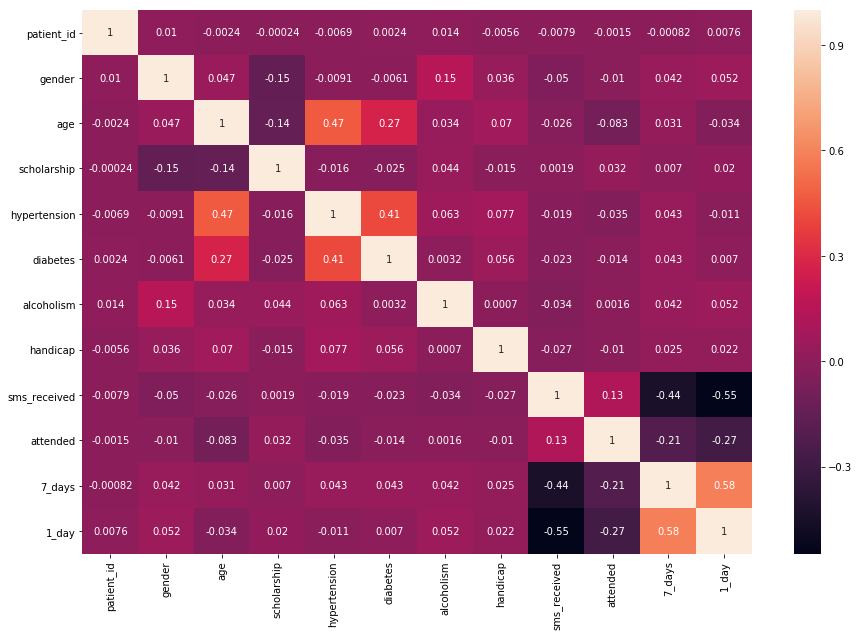

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

>The heat map shows that hypertension, diabetes and age have medium correlation with r beteween diabetes and hypertension of 0.41 and r = 0.47 between age and hypertension, alcoholism and gender are low connected with r = 0.15 and finally sms received is negatively correlated to the fact that there is 1 day or 7 days remaining to the appointement with r of -0.44 and -0.55.

>For showing up, the most correlated factors are sms received (r = 0.13) and the fact that there is 7 days (r = -21) or 1 day left to the appointement (r = -0.27).

**Process:** 
*To find out how these characteristics impact the fact that patient will show up we will use a pair plot for numerical factors with 'attended' in hue.*

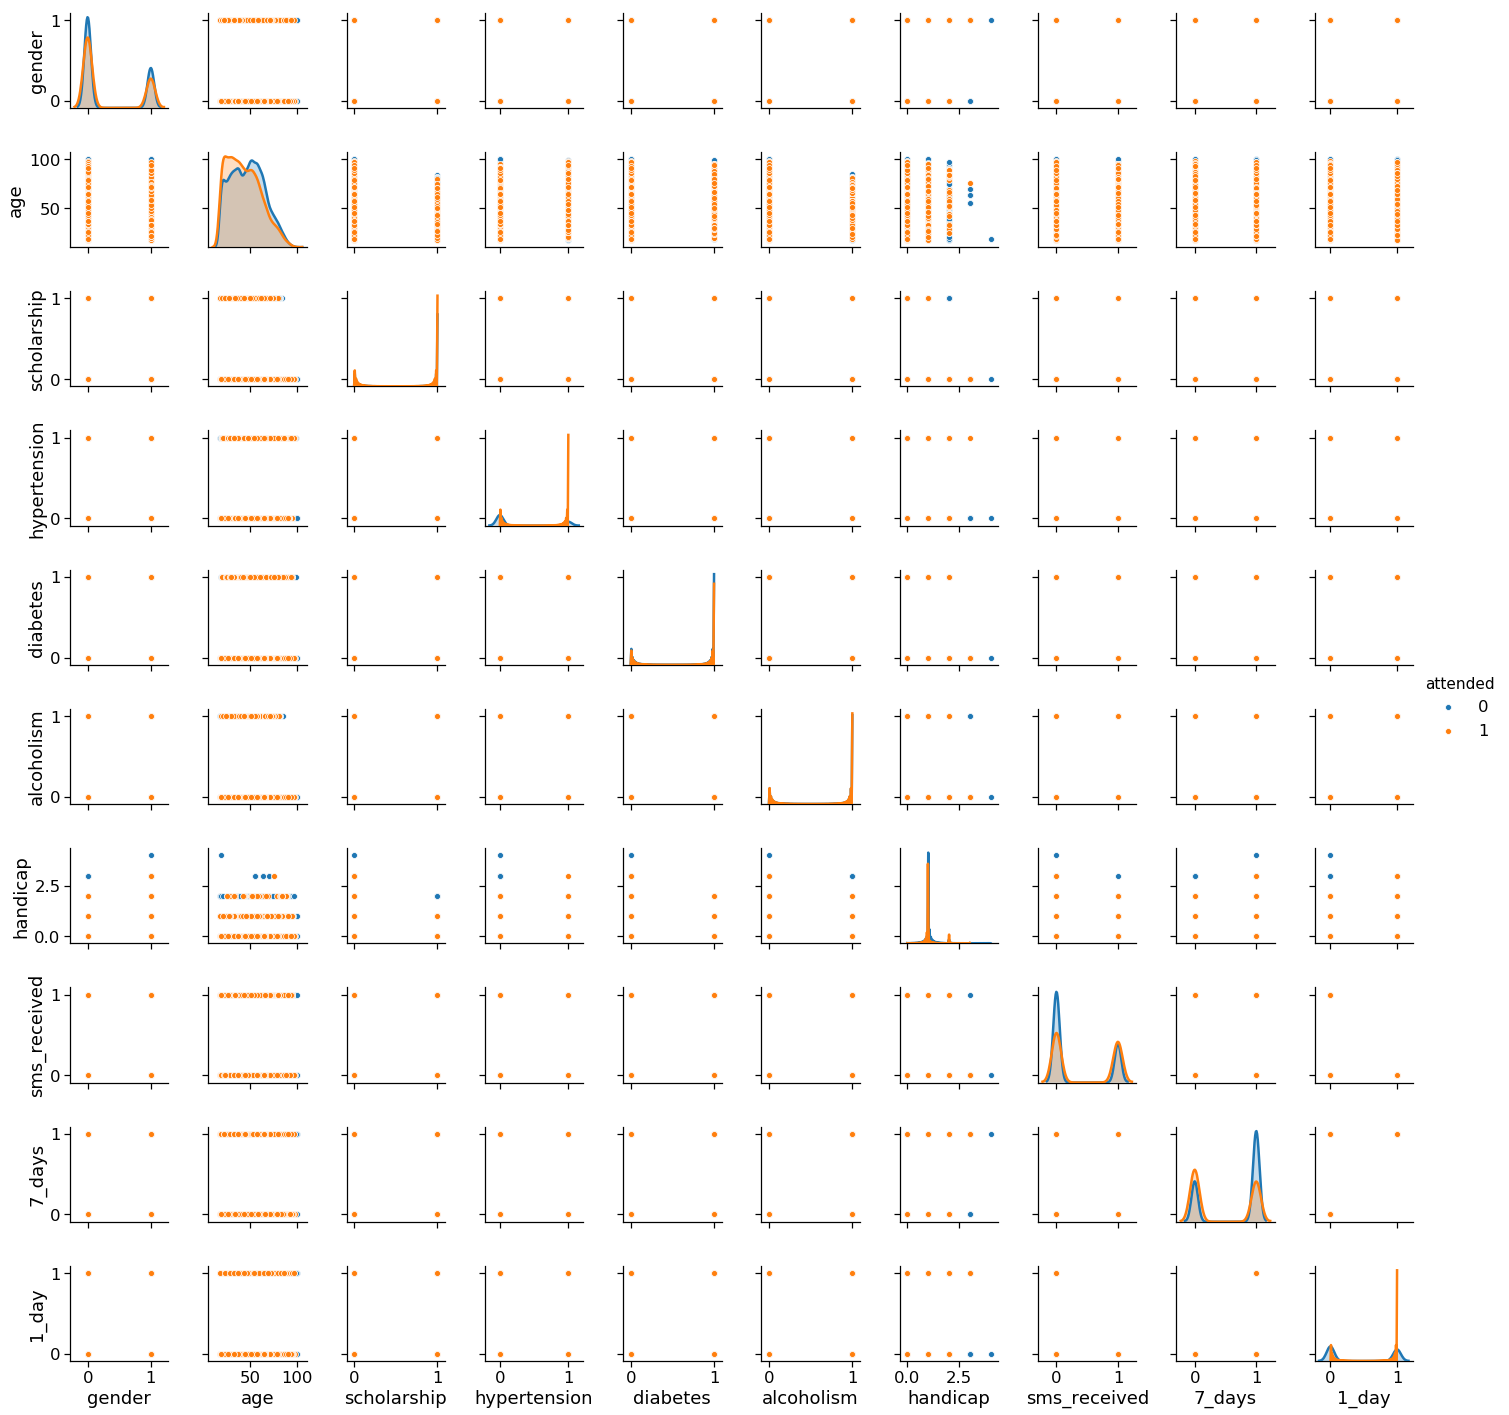

In [26]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(df, hue = 'attended', height = 2, vars=["gender", "age", "scholarship", "hypertension", "diabetes", "alcoholism", "handicap", "sms_received", "7_days", "1_day"])

>According to the pair plot, patient's age impact the fact of showing up, also receiving an sms seems to promote the fact that patients would not show up. Finally, the appointements within 1 day seems to have a higher attendance, unlike appointements within 7 days.

**Process:**
*We will write a function that plot a 100% stacked bar plot to show the impact of each characteristic on the fact that patients will not show up or not.*

In [35]:
def stacked_plot(characteristic, name_0, name_1):   
    # Data
    r = [0,1]
    raw_data = {'greenBars': [df[(df['attended'] == 0) & (df[characteristic] == 0)].shape[0], df[(df['attended'] == 0) & (df[characteristic] == 1)].shape[0]], 'orangeBars': [df[(df['attended'] == 1) & (df[characteristic] == 0)].shape[0], df[(df['attended'] == 1) & (df[characteristic] == 1)].shape[0]]}
    df_raw = pd.DataFrame(raw_data)
 
    # From raw value to percentage
    totals = [i+j for i,j in zip(df_raw['greenBars'], df_raw['orangeBars'])]
    greenBars = [i / j * 100 for i,j in zip(df_raw['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df_raw['orangeBars'], totals)]
 
    # plot
    barWidth = 0.85
    names = (name_0, name_1)
    # Create green Bars
    plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
    # Create orange Bars
    plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel("group")
    plt.ylabel('% of patients')
    plt.title(characteristic + ' attendance Plot')
    # Show graphic
    plt.show()

### Gender

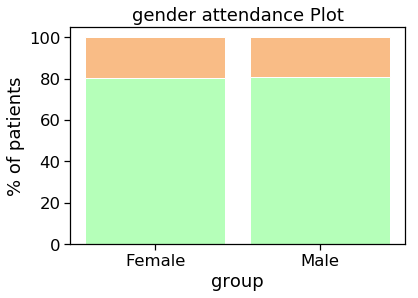

In [36]:
stacked_plot('gender', 'Female', 'Male')

>We have approximately the same proportion of not showing up patients compared to showing up patients for both male and female about 80%. We can conclude that the gender seems to have no connection with the fact that patients will not show up on appointment.

### Age

Text(0.5, 1.0, 'Age Histogram')

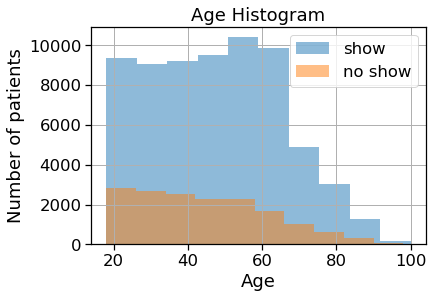

In [37]:
df[df.attended == 0].age.hist(alpha=0.5, label='show')
df[df.attended == 1].age.hist(alpha=0.5, label='no show')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age Histogram')

>We are observing that not showing histogram is inversely proportional to age, unlike showing up histogram. Patients  between 30 and 70 years are more likely to be at the appointment. We can say that the age is correlated to the fact that a patient will show up or not with a non linear manner.

### Sms received

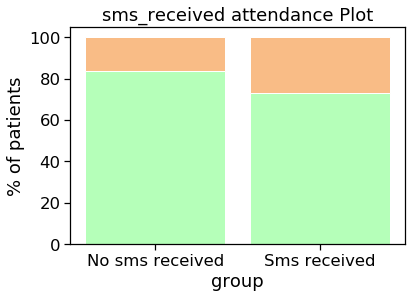

In [38]:
stacked_plot('sms_received', 'No sms received', 'Sms received')

>Paradoxally we observe a higher proportion of not showing up patients when they receive an sms  70% against about 84% when they don't receive an sms. We can conclude that receiving an sms seems to have a correlation on wether a patient will show up or not.

### Scholarship

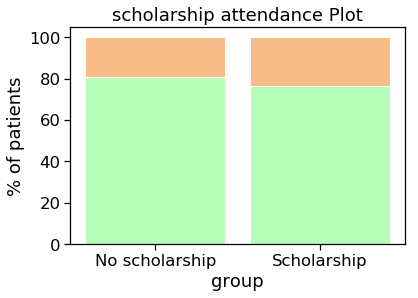

In [39]:
stacked_plot('scholarship', 'No scholarship', 'Scholarship')

> Patients with scholarship have lower attendance 77% but the difference is under 3% which seems to be insignificant .

### Hypertension

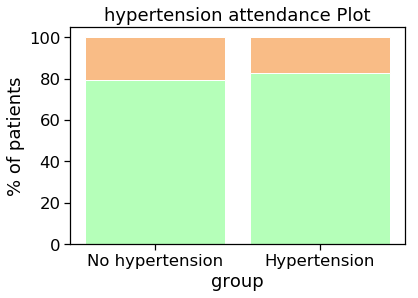

In [42]:
stacked_plot('hypertension', 'No hypertension', 'Hypertension')

> Patients with hypertension have higher attendance 82% but the difference is unsignificant about 2%.

### Diabetes

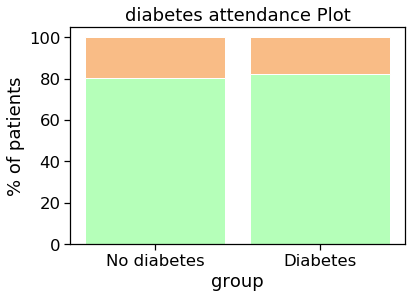

In [41]:
stacked_plot('diabetes', 'No diabetes', 'Diabetes')

> Patients with diabetes have higher attendance 82% but the difference is unsignificant about 1%.

### Alcoholism

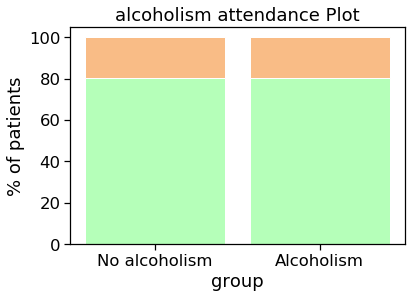

In [43]:
stacked_plot('alcoholism', 'No alcoholism', 'Alcoholism')

> No significant difference in attendance between alcoholic and non alcoholic, both are about 81%.

### Handicap

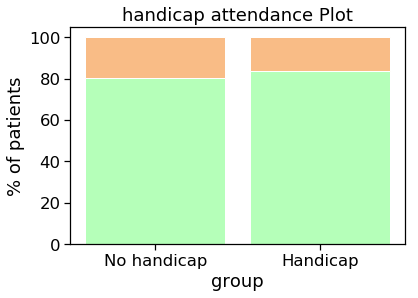

In [44]:
stacked_plot('handicap', 'No handicap', 'Handicap')

> Patients with handicap have higher attendance 83% but the difference seems to be not too significant

### Days within appointement 

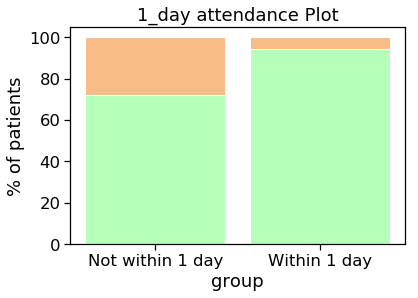

In [45]:
stacked_plot('1_day', 'Not within 1 day', 'Within 1 day')

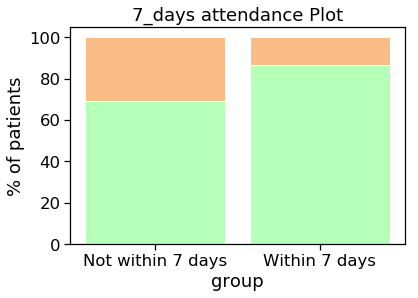

In [47]:
stacked_plot('7_days', 'Not within 7 days', 'Within 7 days')

> We've seen that appointements within 1 day have very high attendance 95% and it seems to decrease over the time (87% for appointments within 7 days and 68% for appointments not within 7 days.

<a id='conclusions'></a>
## Conclusions

> We tried to investigate a medical dataset to see if we can predict which characteristic is influencing wether a patient will show up or not to the appointment. We performed a data cleaning and wrangling and tried to find correlation between those characteristics and the not showing up fact. 

>We found that:

>- The date of the appointement plays a major role in attendance. It seems to be very high within one day and keep decreasing over the time.

>- Receiving an sms decrease the probability of attendance.

>- Attendance seems to increase with age.

>- Gender, Hypertension, diabetes, alcoholism and handicap seems to have no significant correlation with attendance

### Limitation

>Age dataframe was scaled down and we removed outliers .We just Kept age between 18 and 100 years which can affect the accuracy of the results.

>The size and the proportions of sample wich attended to the appointement or not could affect the precision of these findings and distort the results. In fact, the proportion of the attended patients is very large compared to those who did not attended. We should have approximately the same size to avoid this problem.

>We could not confirm these results accurately without statistical approval. We need more advanced statistical models and machine learning techniques for more precision.